In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split

In [22]:
#Load data
data = pd.read_csv("/Users/evanjager/Desktop/creditcard.csv")
data.head()
data_refine 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Understanding the data
The Dataset used is the Kaggle Credit Card Fraud Detection [Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

- The Data has 32 features from V1-V28 which are unknown for confidentiality, TIme, Amount and Class
- The input features are V1-V28, Time and Amount
- The target variable is Class
- The Data consists of all numerical features, and only the Target Variable Class is a categorical feature.
- Class 0: Legitimate Transaction
- Class 1: Fraud Transaction
- The Data does not have any missing values, thus need not be handled
- Best not to remove any columns assuming independent features originally 

In [27]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
print(data.shape)
data.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [37]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlierFract = (float(len(fraud))/float(len(valid)))*100
print(outlierFract)
print("Fraud cases: ", len(fraud))
print('Valid Transactions: ', len(valid))

0.17304750013189596
Fraud cases:  492
Valid Transactions:  284315


We can see only 0.17% of the data is fraudulet. This shows how highly unbalanced the data is.
## What is the relationship of fraud transactions and the amount of money?

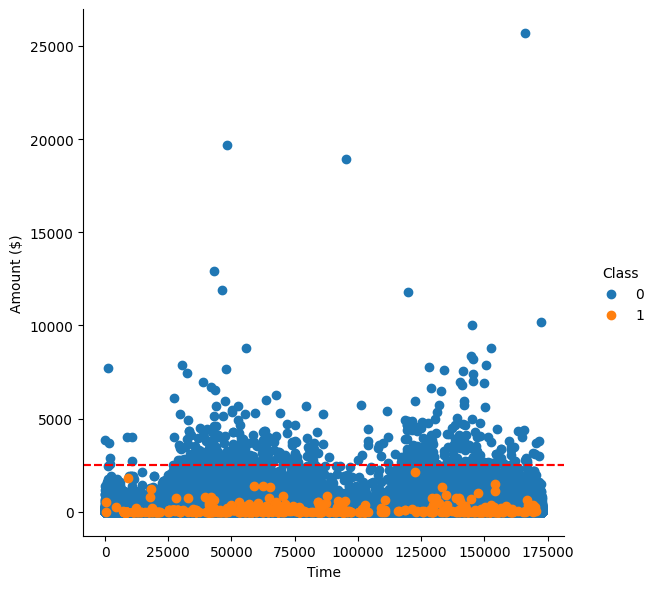

In [28]:
facet_grid = sns.FacetGrid(data, hue='Class', height=6)
facet_grid.map(plt.scatter, 'Time', 'Amount').add_legend()
facet_grid.map(plt.axhline, y=2500, color='r', linestyle='--')
plt.ylabel('Amount ($)')
plt.show()

With the red line displayed at $2500 we can see no fraudulent transactions go above this mark. We can also show this by going through the entire dataset individually

In [36]:
data_refine = data[['Time','Amount','Class']]

over = 0
under = 0

for i in range(data_refine.shape[0]):
    if data_refine.iloc[i]['Amount'] < 2500:
        under += 1
    else:
        over += 1

print('Amount over 2500: ',over)
print('Amount under 2500: ',under)

print((under/data.shape[0])*100)


Amount over 2500:  449
Amount under 2500:  284358
99.84234938045763


We Can see the 99.8% of transactions are under $2500, lets see how many fraud cases there are under $2500.

In [40]:
fraudnum = 0

for i in range(data_refine.shape[0]):
    if data_refine.iloc[i]['Amount'] < 2500:
        if data_refine.iloc[i]['Class'] == 1:
            fraudnum += 1
            
print("Amount of fraudulent cases: ", fraudnum)
print("Amount of fraudulent transactions throughout the entire dataset: ", len(fraud))

Amount of fraudulent cases:  492
Amount of fraudulent transactions throughout the entire dataset:  492


Using the length of the fraud dataframe we created earlier we can prove that all of the fraud transactions are under $2500

In [6]:
print('Amount details of the Fraud transactions')
fraud.Amount.describe()

Amount details of the Fraud transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print('Amount details of valid transactons')
valid.Amount.describe()

Amount details of valid transactons


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We can see that the average amount for the fraudulent transaction is more than the average amount for valid transactions. making this a curial problem to deal with.

<function matplotlib.pyplot.show(close=None, block=None)>

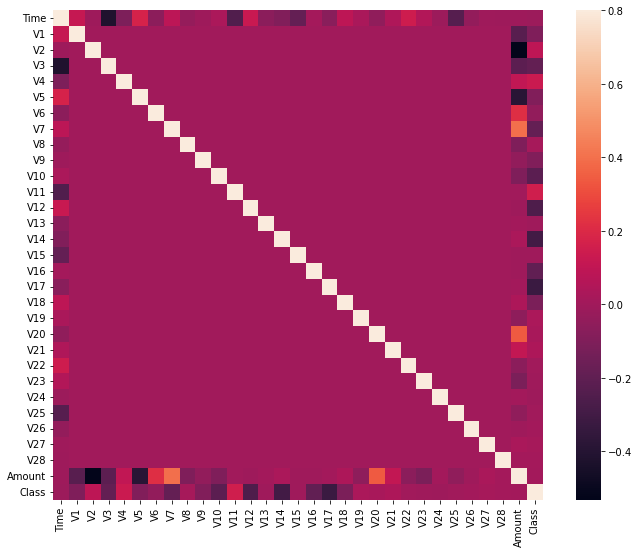

In [8]:
cormat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(cormat, vmax = 0.8,square= True)
plt.show

In the heat map we can see the features do not correlate with eachother but as you can see there is corralation with the versions and the ammounts. For example V2 and the ammount have a very high negative correlation.

In [127]:
#Spliting our data
X = data.drop(['Class'], axis = 1)
Y = data.loc[:,'Class']
print(X.shape)
print(Y.shape)
x = X.values
y = Y.values

(284807, 30)
(284807,)


In [130]:
#split into train and test sets
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [157]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

## Balancing the Dataset

<Axes: ylabel='count'>

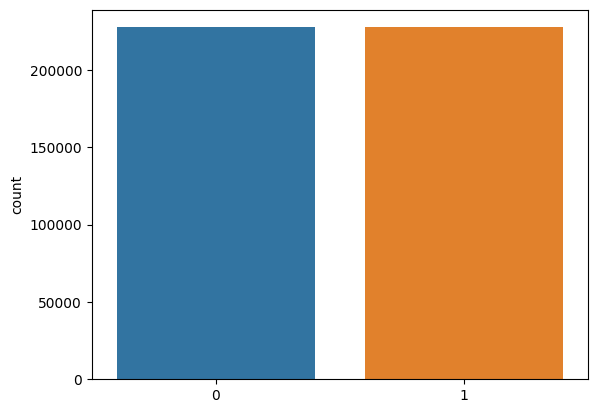

In [165]:
# Use Synthetic Minority Oversampling
smote = SMOTE(random_state=42)
X_re, Y_re = smote.fit_resample(xTrain,yTrain)
sns.countplot(x=Y_re)

Now the dataset is balanced

In [218]:
def evaluate(model,xTest,yTest):
    predictions = model.predict(xTest)
    accuracy = accuracy_score(yTest,predictions)
    print("Accuracy: ",accuracy)
    
    precision = precision_score(yTest,predictions)
    print('Precision: ', precision)

    recall = recall_score(yTest,predictions)
    print('Recal Score: ', recall)

    f1 = f1_score(yTest,predictions)
    print('F1 score: ',f1)

    MCC = matthews_corrcoef(yTest,predictions)
    print('Matthews correlation coefficient: ',MCC)
    return predictions, accuracy
    
    

In [141]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [146]:
criterion_list = ['gini','entropy']
n_estimators_list = np.arange(100, 600, step=100)
max_features = ['sqrt']
max_depth_list = [3,5]
min_samples_split_list = np.arange(2, 10, step=2)
min_samples_leaf = sp_randint(1,4)
bootstrap_list = [True,False]

random_grid = {'criterion': criterion_list,
               'n_estimators':n_estimators_list,
               'max_features': max_features,
               'max_depth': max_depth_list,
               'min_samples_split': min_samples_split_list,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap_list}
random_grid


{'criterion': ['gini', 'entropy'],
 'n_estimators': array([100, 200, 300, 400, 500]),
 'max_features': ['sqrt'],
 'max_depth': [3, 5],
 'min_samples_split': array([2, 4, 6, 8]),
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x28891fa10>,
 'bootstrap': [True, False]}

In [186]:
rf = RandomForestClassifier()
param_grid_rf = {'bootstrap': [True,False],
                 'n_estimators':[100,200,300],
                 'max_depth':[3,5]}
rfc_Grid = GridSearchCV(estimator=rf,param_grid=param_grid_rf,n_jobs=-1, cv=3, verbose=1,
                        return_train_score=False)


rfc_Grid.fit(X_re,Y_re)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [200]:
rfc_Grid.best_params_

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 100}

In [219]:
base = RandomForestClassifier()
base.fit(X_re,Y_re)
print("Base Model:")
RF_base_predictions, base_accuracy = evaluate(base,xTest,yTest)

print('Random search best:')
Rf_best_predictions, best_accuracy = evaluate(rfc_Grid,xTest,yTest)

Base Model:
Accuracy:  0.999403110845827
Precision:  0.826530612244898
Recal Score:  0.826530612244898
F1 score:  0.826530612244898
Matthews correlation coefficient:  0.8262316533253706
Random search best:
Accuracy:  0.9942242196552087
Precision:  0.21481481481481482
Recal Score:  0.8877551020408163
F1 score:  0.3459244532803181
Matthews correlation coefficient:  0.4351207483053985


We can see that Both tuned and base models provide very good results but the base model actually out preforms

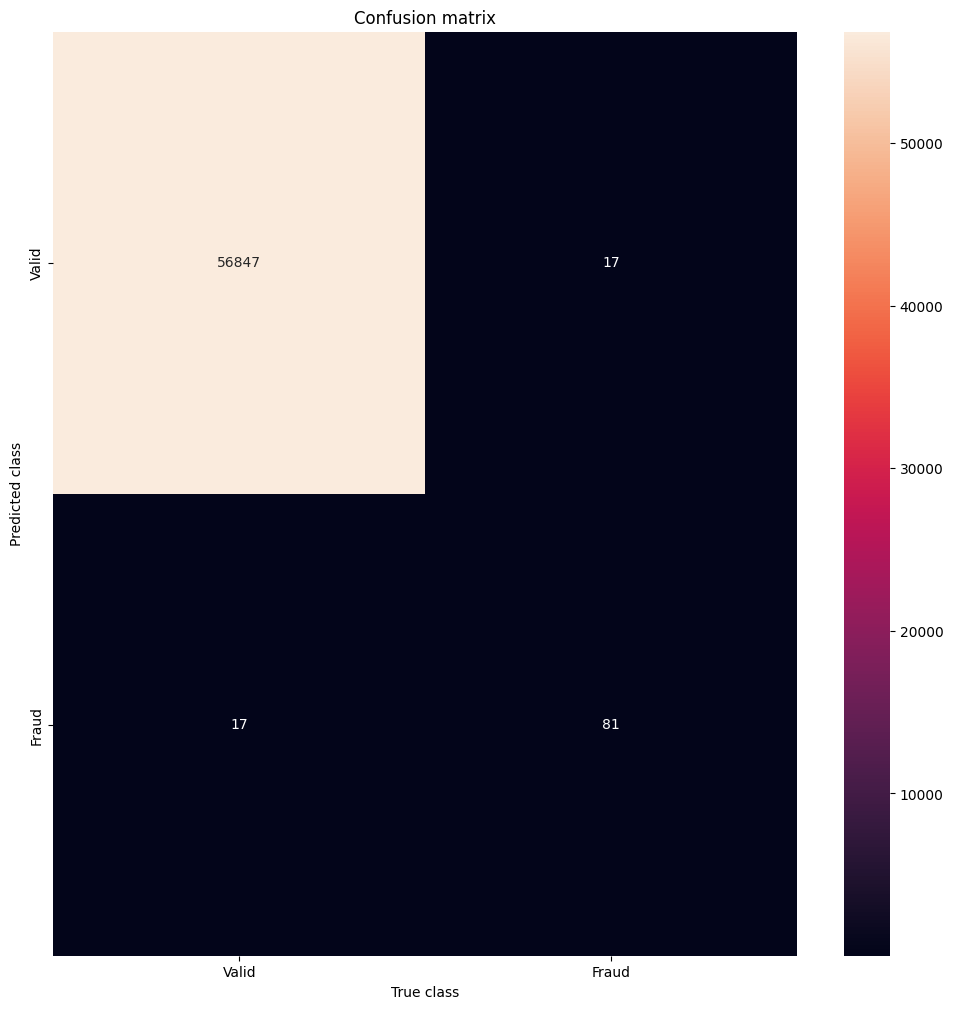

In [220]:
#visualize with the confusion matrix 
labels = ['Valid','Fraud']
matrix = confusion_matrix(yTest,RF_base_predictions)
plt.figure(figsize = (12,12))
sns.heatmap(matrix, xticklabels= labels,yticklabels=labels,annot = True,fmt='d')
plt.title('Confusion matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.show()

In [189]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [208]:
Lr = LogisticRegression()
param_grid_lr = {'penalty': ['l1','l2'],
                 'class_weight': [None, 'balanced'],
                 'C':[1,2,3]}
grid_lr = GridSearchCV(estimator=Lr, param_grid=param_grid_lr, n_jobs=-1, cv=3, verbose=1, 
                       return_train_score=False)
grid_lr.fit(X_re, Y_re)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [221]:
base_lr = LogisticRegression()
base_lr.fit(X_re,Y_re)
print("Base Model:")
Lr_base_predictions, baseLr_accuracy = evaluate(base_lr,xTest,yTest)

print('Random search best:')
Lr_best_predictions, bestLr_accuracy = evaluate(grid_lr,xTest,yTest)

Base Model:
Accuracy:  0.9774937677750078
Precision:  0.06534508076358296
Recal Score:  0.9081632653061225
F1 score:  0.12191780821917808
Matthews correlation coefficient:  0.24028682239106283
Random search best:
Accuracy:  0.9774937677750078
Precision:  0.06534508076358296
Recal Score:  0.9081632653061225
F1 score:  0.12191780821917808
Matthews correlation coefficient:  0.24028682239106283


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


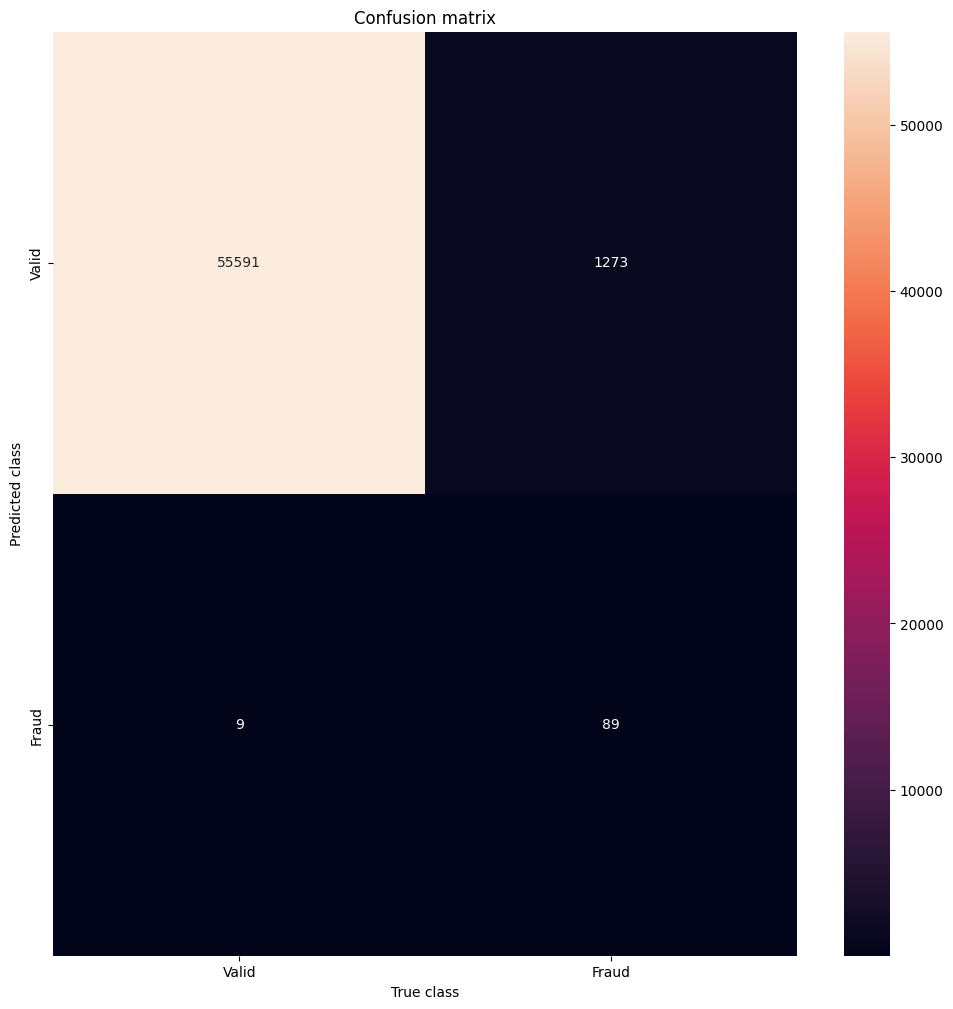

In [222]:
#visualize with the confusion matrix 
labels = ['Valid','Fraud']
matrix = confusion_matrix(yTest,Lr_best_predictions)
plt.figure(figsize = (12,12))
sns.heatmap(matrix, xticklabels= labels,yticklabels=labels,annot = True,fmt='d')
plt.title('Confusion matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.show()

In [194]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [195]:
KN = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [2,3,5],
                  'leaf_size':[20,30,40]}
grid_knn = GridSearchCV(estimator=KN, param_grid=param_grid_knn, n_jobs=-1, cv=3, verbose=1, 
                        return_train_score=False)
grid_knn.fit(X_re, Y_re)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [20, 30, 40], 'n_neighbors': [2, 3, 5]},
             verbose=1)

In [225]:
base_kn = KNeighborsClassifier()
base_kn.fit(X_re,Y_re)
print("Base Model:")
kn_base_predictions,basekn_accuracy = evaluate(base_kn,xTest,yTest)

print('Random search best:')
kn_best_predictions,bestkn_accuracy = evaluate(grid_knn,xTest,yTest)

Base Model:
Accuracy:  0.9452793090130263
Precision:  0.01665065642010887
Recal Score:  0.5306122448979592
F1 score:  0.03228810928283142
Matthews correlation coefficient:  0.08676747110431243
Random search best:
Accuracy:  0.9770548786910572
Precision:  0.03819709702062643
Recal Score:  0.5102040816326531
F1 score:  0.0710732054015636
Matthews correlation coefficient:  0.13498763527392685


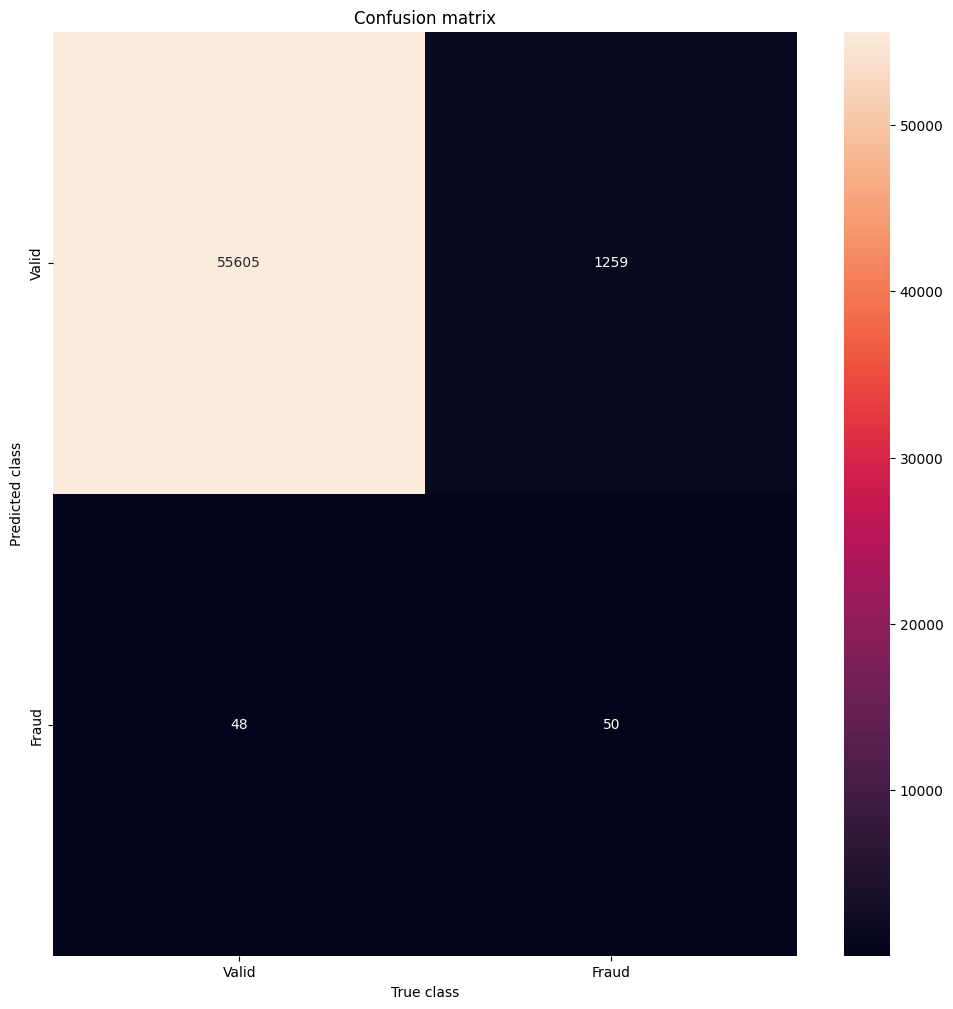

In [226]:
labels = ['Valid','Fraud']
matrix = confusion_matrix(yTest,kn_best_predictions)
plt.figure(figsize = (12,12))
sns.heatmap(matrix, xticklabels= labels,yticklabels=labels,annot = True,fmt='d')
plt.title('Confusion matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.show()

In [227]:
acc_data = { 'Model' : ['Random Forest','Logistic Regression', 'KNeighbors'],
            'Accuracy' : [base_accuracy,bestLr_accuracy,bestkn_accuracy]
}
df = pd.DataFrame(acc_data)
df

,Model,Accuracy
0,Random Forest,0.999403
1,Logistic Regression,0.977494
2,KNeighbors,0.977055


## Conclusions
- SMOTE overcomes over fitting by synthetically oversampling minority class labels and is successful to a great degree
- The Base Random Forest classifier shows the best accuracy with a 0.99% accuracy
## Summary
- All Fraud Transactions occur for an amount below 2500. Thus, the bank can infer clearly that the fraud committers try to commit frauds of smaller amounts to avoid suspicion.
- The fraud transactions are equitable distributed throughout time and there is no clear relationship of time with committing of fraud.
- The number of fraud transactions are very few compared to legitimate transactions and it has to be balanced in order for a fair comparison to prevent the model from over fitting.